In [ ]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from data import *

<Axes: >

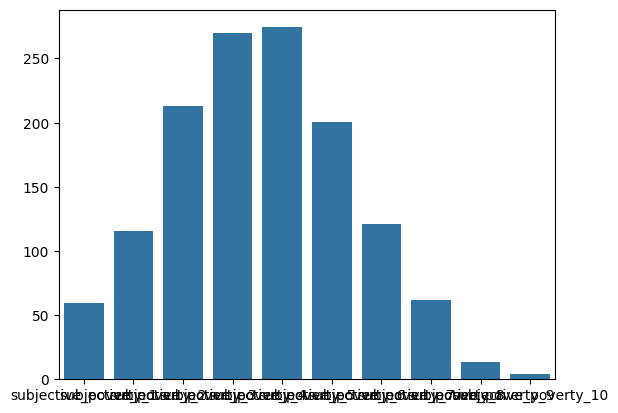

In [11]:
filename = "elasticnet-logistic-1(manual mod)-2.csv"
predictions = pd.read_csv(os.path.join(PREDICTIONS_DIR, filename))
prediction_probabilities = predictions.iloc[:, 1:]
sns.barplot(data=prediction_probabilities.sum(axis=0))

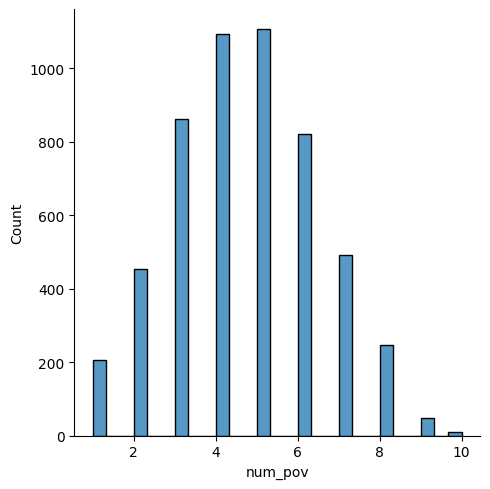

In [7]:
from data import combined_train_with_num_pov

sns.displot(combined_train_with_num_pov["num_pov"])

## Mahalanobis distance


In [ ]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet


from data import *

_, doi, _ = get_divided_edu(
    remove_boring_columns(combined_transformed_train_with_num_pov)
)

preprocessor = get_preprocessor(
    imputer_strategy=[
        "most_frequent",
        "most_frequent",
        "median",
        "median",
    ],
    remainder="drop",
)

doi_processed = preprocessor.fit_transform(doi)

robust_cov = MinCovDet().fit(doi_processed)
emp_cov = EmpiricalCovariance().fit(doi_processed)

emp_mahal = emp_cov.mahalanobis(doi_processed - np.mean(doi_processed, axis=0)) ** (
    0.33
)
robust_mahal = robust_cov.mahalanobis(doi_processed - robust_cov.location_) ** (0.33)

/home/yhbleung/anaconda3/envs/sta841kaggle/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:748: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [ ]:
doi_processed

<Axes: ylabel='Count'>

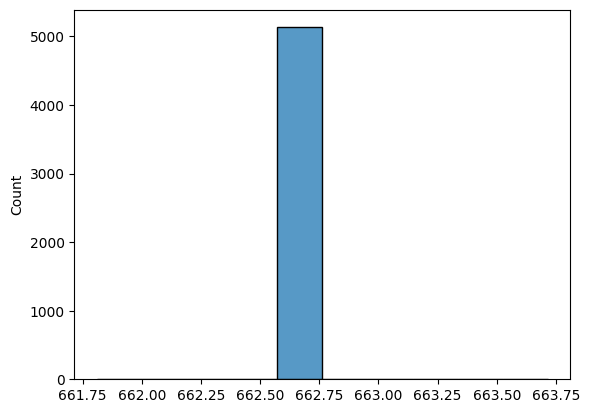

In [19]:
sns.histplot(emp_mahal, bins=10)

<Axes: ylabel='Count'>

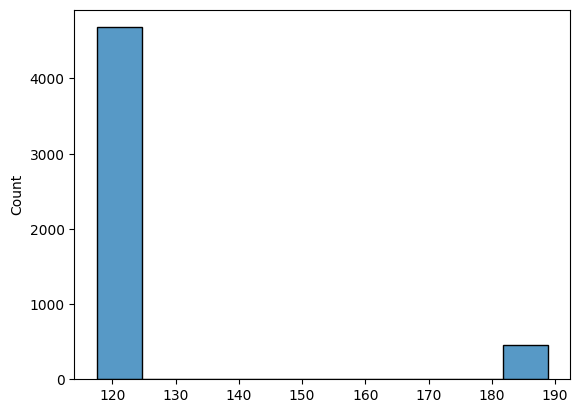

In [ ]:
sns.histplot(robust_mahal, bins=10)

In [ ]:
threshold = 150
robust_mahal_outliers = robust_mahal > threshold
outliers = doi[robust_mahal_outliers]
outliers